# Dataset Combination Logic

This notebook is responsible for dataset normalization, and merging the NOAA weather dataset with the forest fire dataset.

In [ ]:
pip install haversine

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning and Feature Engineering Utility Functions

In [ ]:
def count_missing_data(df):
  # Count the number of missing values by feature:
  df_na = df.isna().sum()
  df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
  df_na = (df_na / len(df)) * 100
  missing_data = pd.DataFrame({"Missing Ratio" : df_na})
  display(missing_data)
  return missing_data

In [ ]:
from haversine import haversine
"""
Given two coordinates, the haversine distance is the distance between the points, as the crow-flies
Returns distance in kilometers.
Source: https://www.movable-type.co.uk/scripts/latlong.html
"""

'\nGiven two coordinates, the haversine distance is the distance between the points, as the crow-flies\nReturns distance in kilometers.\nSource: https://www.movable-type.co.uk/scripts/latlong.html\n'

In [ ]:
import pandas as pd
land_temp_by_state = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/GlobalLandTemperatures/GlobalLandTemperaturesByState.csv")

# Dataset One: Average Temperature and Average Temperature Uncertainty of California

In [ ]:
ca_yearly_average_temp_raw = land_temp_by_state[land_temp_by_state.State == "California"]
ca_yearly_average_temp_raw["dt"] = pd.to_datetime(ca_yearly_average_temp_raw["dt"])

ca_yearly_average_temp = pd.DataFrame()
ca_yearly_average_temp["Year"] = ca_yearly_average_temp_raw["dt"].dt.year
ca_yearly_average_temp["Month"] = ca_yearly_average_temp_raw["dt"].dt.month
ca_yearly_average_temp["AverageTemperature"] = ca_yearly_average_temp_raw["AverageTemperature"]
ca_yearly_average_temp["AverageTemperatureUncertainty"] = ca_yearly_average_temp_raw["AverageTemperatureUncertainty"]

display(ca_yearly_average_temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Month,AverageTemperature,AverageTemperatureUncertainty
71058,1849,1,5.591,2.405
71059,1849,2,6.941,2.041
71060,1849,3,9.731,2.294
71061,1849,4,12.294,2.861
71062,1849,5,14.417,2.215
...,...,...,...,...
73030,2013,5,17.899,0.228
73031,2013,6,22.513,0.265
73032,2013,7,25.563,0.206
73033,2013,8,23.460,0.369


# Dataset Two: Wildfires in the United States 1992 - 2015

In [ ]:
fires_raw = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/us_wildfire_data/fires.csv")
del fires_raw["Shape"] # Deleting this here because the column is causing me issues later and is 99% empty
fires_raw = fires_raw[fires_raw.STATE == "CA"] # Only look at the state of california
fires = pd.DataFrame()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
display(fires_raw)
fires_raw.info()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,009371,NaN,ODESSA 2,NaN,NaN,NaN,NaN,NaN,2015,2457291.5,269,1726.0,13.0,Missing/Undefined,2457291.5,269.0,1843.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,000366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457300.5,278,126.0,9.0,Miscellaneous,NaN,NaN,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,000158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457144.5,122,2052.0,13.0,Missing/Undefined,NaN,NaN,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,000380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2457309.5,287,2309.0,13.0,Missing/Undefined,NaN,NaN,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189550 entries, 0 to 1880464
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    189550 non-null  int64  
 1   FOD_ID                      189550 non-null  int64  
 2   FPA_ID                      189550 non-null  object 
 3   SOURCE_SYSTEM_TYPE          189550 non-null  object 
 4   SOURCE_SYSTEM               189550 non-null  object 
 5   NWCG_REPORTING_AGENCY       189550 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      189550 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    189550 non-null  object 
 8   SOURCE_REPORTING_UNIT       189550 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  189550 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        61933 non-null   object 
 11  LOCAL_INCIDENT_ID           127983 non-null  object 
 12  FIRE_CODE                   55522 non-null   object 
 13  FIRE_NAME    

In [ ]:
# Get the names for each cause code
causes = fires_raw[["STAT_CAUSE_CODE", "STAT_CAUSE_DESCR"]]
code_to_name = {}
for row in causes[:-1].values:
  code_to_name[int(row[0])] = row[1]
print(code_to_name)

{9: 'Miscellaneous', 1: 'Lightning', 5: 'Debris Burning', 4: 'Campfire', 2: 'Equipment Use', 8: 'Children', 7: 'Arson', 3: 'Smoking', 6: 'Railroad', 10: 'Fireworks', 12: 'Structure', 11: 'Powerline', 13: 'Missing/Undefined'}


### Dataset Two: Wildfires Cleaning

#### Dataset Two: Wildfires Drop Missing Values

In [ ]:
missing = count_missing_data(fires_raw)

drops = missing[missing["Missing Ratio"] > 60].index
print(f"Dropping columns { drops }")
for feature in drops:
  del fires_raw[feature]

fires_raw.info()

,Missing Ratio
COMPLEX_NAME,99.510947
MTBS_FIRE_NAME,99.400158
MTBS_ID,99.400158
ICS_209_NAME,98.502770
ICS_209_INCIDENT_NUMBER,98.502770
FIRE_CODE,70.708520
FIPS_NAME,70.339752
FIPS_CODE,70.339752
COUNTY,70.339752
LOCAL_FIRE_REPORT_ID,67.326299


Dropping columns Index(['COMPLEX_NAME', 'MTBS_FIRE_NAME', 'MTBS_ID', 'ICS_209_NAME',
       'ICS_209_INCIDENT_NUMBER', 'FIRE_CODE', 'FIPS_NAME', 'FIPS_CODE',
       'COUNTY', 'LOCAL_FIRE_REPORT_ID'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 189550 entries, 0 to 1880464
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    189550 non-null  int64  
 1   FOD_ID                      189550 non-null  int64  
 2   FPA_ID                      189550 non-null  object 
 3   SOURCE_SYSTEM_TYPE          189550 non-null  object 
 4   SOURCE_SYSTEM               189550 non-null  object 
 5   NWCG_REPORTING_AGENCY       189550 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      189550 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    189550 non-null  object 
 8   SOURCE_REPORTING_UNIT       189550 non-null  object 
 9   SOURCE_REPORTING_UNIT_N

#### Dataset Two: Impute Remaining Missing Values

In [ ]:
# fires_raw["DISCOVERY_DATE"]
# pd.to_datetime(fires_raw["DISCOVERY_DATE"]).dt.month.unique()
# fires_raw["DISCOVERY_DOY"].unique()

def doy_to_month(doy):
  if doy <= 31:
    return 1
  elif doy <= 59:
    return 2
  elif doy <= 90:
    return 3
  elif doy <= 120:
    return 4
  elif doy <= 151:
    return 5
  elif doy <= 181:
    return 6
  elif doy <= 212:
    return 7
  elif doy <= 243: # August
    return 8
  elif doy <= 273:
    return 9
  elif doy <= 304:
    return 10
  elif doy <= 334:
    return 11
  else:
    return 12

In [ ]:
# We have two output variables of interest: FIRE_SIZE and STAT_CAUSE_CODE.
# We also have output variables of interest: CONT_TIME, CONT_DOY, DISCOVERY_TIME
# We will drop any rows without a value for these
# We already know it is in california
fires_raw = fires_raw.dropna(subset=["FIRE_SIZE", "STAT_CAUSE_CODE", "STATE", "CONT_TIME", "DISCOVERY_TIME"])

# We will drop fire name as you can't learn from it
# Drop local incident id as it isn't relevant either
if "FIRE_NAME" in fires_raw.columns:
  del fires_raw["FIRE_NAME"]

if "LOCAL_INCIDENT_ID" in fires_raw.columns:
  del fires_raw["LOCAL_INCIDENT_ID"]

In [ ]:
# Look at remaining missing values.
count_missing_data(fires_raw)
fires_raw.isna().sum()

fires_raw.info()

,Missing Ratio


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91184 entries, 0 to 1880460
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    91184 non-null  int64  
 1   FOD_ID                      91184 non-null  int64  
 2   FPA_ID                      91184 non-null  object 
 3   SOURCE_SYSTEM_TYPE          91184 non-null  object 
 4   SOURCE_SYSTEM               91184 non-null  object 
 5   NWCG_REPORTING_AGENCY       91184 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      91184 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    91184 non-null  object 
 8   SOURCE_REPORTING_UNIT       91184 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  91184 non-null  object 
 10  FIRE_YEAR                   91184 non-null  int64  
 11  DISCOVERY_DATE              91184 non-null  float64
 12  DISCOVERY_DOY               91184 non-null  int64  
 13  DISCOVERY_TIME              9

In [ ]:
# Value imputation should be complete.
count_missing_data(fires_raw)
fires_raw.isna().sum()

,Missing Ratio


OBJECTID                      0
FOD_ID                        0
FPA_ID                        0
SOURCE_SYSTEM_TYPE            0
SOURCE_SYSTEM                 0
NWCG_REPORTING_AGENCY         0
NWCG_REPORTING_UNIT_ID        0
NWCG_REPORTING_UNIT_NAME      0
SOURCE_REPORTING_UNIT         0
SOURCE_REPORTING_UNIT_NAME    0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
DISCOVERY_TIME                0
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
CONT_DATE                     0
CONT_DOY                      0
CONT_TIME                     0
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
dtype: int64

Next, we will add the discovery and containment months.

In [ ]:
fires_raw["DISCOVERY_MONTH"] = fires_raw["DISCOVERY_MONTH"] = fires_raw["DISCOVERY_DOY"].apply(doy_to_month)
fires_raw["CONTAINMENT_MONTH"] = fires_raw["CONT_DOY"].apply(doy_to_month)
fires_raw["DISCOVERY_MONTH"].unique()

array([ 2,  5,  6,  7,  3,  9, 10, 11,  4,  8,  1, 12])

Next, we split up columns into types by hand. We find this is the most precise way to do it.

In [ ]:
display(fires_raw)

# SPECIAL COLS
FIRES_SPECIAL_COLS = ["FOD_ID", "LATITUDE", "LONGITUDE"]

# TIME RELATED COLS
FIRE_TIME_COLS = ["FIRE_YEAR", "DISCOVERY_DOY", "DISCOVERY_TIME", "CONT_DOY", "CONT_TIME", "DISCOVERY_MONTH", "CONTAINMENT_MONTH"]
FIRE_TIME_DATETIME = ["DISCOVERY_DATE", "CONT_DATE"]

# CATEGORICAL COLS
FIRES_CAT_COLS = ["SOURCE_SYSTEM_TYPE", "SOURCE_SYSTEM", "NWCG_REPORTING_AGENCY", "OWNER_DESCR", "NWCG_REPORTING_UNIT_NAME", "SOURCE_REPORTING_UNIT_NAME"]

# REDUNDANT COLS
FIRES_CAT_COL_REDUNDANT = ["SOURCE_REPORTING_UNIT", "OWNER_CODE", "NWCG_REPORTING_UNIT_ID"]

# EXTRA COLS TO DROP
FIRES_DROPS = ["OBJECTID", "FPA_ID"]

# OUTPUT COLS
OUTPUT_VALUES = ["FIRE_SIZE", "FIRE_SIZE_CLASS", "STAT_CAUSE_CODE", "STAT_CAUSE_DESCR", "CONT_DOY", "CONT_TIME"]

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,DISCOVERY_MONTH,CONTAINMENT_MONTH
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,2,2
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,5,5
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,6,6
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,6,7
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,1880457,300348328,2015CAIRS27369138,NONFED,ST-CACDF,ST/C&L,USCATGU,Tehama-Glenn Unit,CATGU,Tehama-Glenn Unit,2015,2457187.5,165,1714.0,13.0,Missing/Undefined,2457187.5,165.0,1913.0,2.22,B,40.019907,-122.391398,13.0,STATE OR PRIVATE,CA,6,6
1880457,1880458,300348354,2015CAIRS28234594,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,2015,2457295.5,273,2357.0,7.0,Arson,2457296.5,274.0,56.0,1.00,B,40.588583,-123.069617,13.0,STATE OR PRIVATE,CA,9,10
1880458,1880459,300348361,2015CAIRS27957490,NONFED,ST-CACDF,ST/C&L,USCAHUU,Humboldt-Del Norte Unit,CAHUU,Humboldt-Del Norte Unit,2015,2457235.5,213,1331.0,1.0,Lightning,2457240.5,218.0,1000.0,4.00,B,40.244833,-123.544167,15.0,UNDEFINED FEDERAL,CA,8,8
1880459,1880460,300348362,2015CAIRS28291374,NONFED,ST-CACDF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,Sonoma-Lake Napa Unit,2015,2457170.5,148,1420.0,9.0,Miscellaneous,2457170.5,148.0,1436.0,0.50,B,38.415608,-122.660044,13.0,STATE OR PRIVATE,CA,5,5


In [ ]:
# Drop the last irrelevant columns.
if "OBJECTID" in fires_raw.columns:
  del fires_raw["OBJECTID"] 
if "FPA_ID" in fires_raw.columns:
  del fires_raw["FPA_ID"] 

# Drop redundant cols
for col in FIRES_CAT_COL_REDUNDANT:
  if col in fires_raw.columns:
    del fires_raw[col]

Docs:

Create a df where we have land temperature for every city in Cali using a dataset that maps lat/long to zipcodes and filters based on that

Create a model that uses knn to predict the acreage of a fire after it has started

Create a model that uses linear regression to predict the acreage of a fire after it has started

Create a model that uses svm to predict 

Dataset we can use for city, state, latitude, longitude calculations
https://github.com/kelvins/US-Cities-Database

Next, we will load in the third climate data set. 

For each fire, we want to match it with weather data from the following time periods 

1. Weather from month prior to fire occuring
2. Weather from second month from fire occuring
3. Weather from prior year of same month. 

TBD How we will handle rows that don't have these matches....

In [ ]:
import pandas as pd
noaa_weather = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/noaa_weather/noaa_CA_1992_2016_weather_2781174_CLEANED.csv")
display(noaa_weather)

,Unnamed: 0,STATION,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,YEAR,MONTH,NUM_COOLING_DEGREE_DAY_CUMULATIVE,NUM_COOLING_DEGREE_DAY,NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,EXTREME_MAXIMUM_TEMPERATURE_MONTH,HEATING_DEGREE_DAYS_TO_DATE,NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,TEMPERATURE_AVERAGE,TEMPERATURE_MAX,TEMPERATURE_MIN
0,0,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,1,-1.239760,-0.886171,-0.155696,-0.232580,-1.159138,-0.641117,-0.298527,-0.931493,0.276062,0.620398,-0.616045,-0.888925,-0.238356
1,1,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,2,-0.850883,-0.338919,-0.155696,-0.935826,-0.674220,-0.641117,0.507624,-0.273876,0.414650,-0.118340,-0.162957,-0.623405,0.405357
2,2,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,3,-0.850883,-0.886171,-0.155696,-0.935826,-0.835859,-0.641117,0.641983,-0.142352,0.507975,-0.108910,-0.121133,-0.431983,0.270626
3,3,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,4,-0.316022,0.351139,-0.155696,-0.935826,0.214796,-0.641117,0.709162,0.252218,0.571894,-0.703044,0.401661,0.154633,0.667333
4,4,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,5,0.477971,1.449139,-0.155696,-0.935826,1.346270,1.326651,1.246597,0.975598,0.595793,-1.133713,1.245103,1.062343,1.393381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,8394,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2011,11,0.739154,-0.886171,-0.155696,1.291149,-0.997499,-0.641117,-1.239037,-0.602685,0.213511,1.349706,-1.194604,-1.216195,-1.091650
5775,8199,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,1994,12,0.728818,-0.886171,-0.155696,1.609640,-1.159138,-0.641117,-1.239037,-1.786396,0.517746,1.736365,-1.480398,-1.481716,-1.383566
5776,8386,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2010,12,0.772949,-0.886171,-0.155696,1.740558,-1.159138,-0.641117,-1.709292,-1.720635,0.531317,2.141885,-1.703457,-1.654613,-1.645542
5777,8386,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2011,12,0.772949,-0.886171,-0.155696,1.740558,-1.159138,-0.641117,-1.709292,-1.720635,0.531317,2.141885,-1.703457,-1.654613,-1.645542


Here, we add a column indicating the distance of the fire from each station. Be patient, takes about 5 minutes to run!

In [ ]:
# STEP 1: Pair every fire in the database with it's closest station
station_lat_long_pairs = noaa_weather[["STATION_NAME", "LATITUDE", "LONGITUDE"]]
station_lat_long_pairs = station_lat_long_pairs.drop_duplicates()
# station_lat_long_pairs["DISTANCE_FROM_STATION_NAME"] = station_lat_long_pairs["STATION_NAME"].apply(lambda name: ("DISTANCE_FROM_" + name))
station_lat_long_pairs.set_index("STATION_NAME", inplace=True)

# display(station_lat_long_pairs)
# display(station_lat_long_pairs)

fire_id_lat_long_pairs = fires_raw[["FOD_ID", "LATITUDE", "LONGITUDE"]]

def haversine_distance_to_each_station(fire_data):
  fire_lat = fire_data["LATITUDE"]
  fire_long = fire_data["LONGITUDE"]

  distances = station_lat_long_pairs.apply(lambda station_data: haversine((fire_lat, fire_long), (station_data["LATITUDE"], station_data["LONGITUDE"])), axis=1, result_type="expand")
  fire_data = fire_data.append(distances)
  return fire_data

fires_raw = fires_raw.apply(haversine_distance_to_each_station, axis=1)

In [ ]:
display(fires_raw)
fires_raw.to_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/cleaned_fires_data_with_distance_to_each_station_2.csv")

,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISCOVERY_MONTH,CONTAINMENT_MONTH,COHASSET,LADDER_BUTTE,JUANITA_LAKE,EEL_RIVER,SOLDIER_MOUNTAIN,HELL_HOLE,LAS_TABLAS,STAMPEDE,BROOKS,SCORPION,OAK_CREEK,PANAMINT,WOLVERTON,PILOT_HILL,LA_HONDA,SQUAW_LAKE,HERNANDEZ,BODIE,VAN_BREMMER,HUNTER_MOUNTAIN
0,1,FED,FS-FIRESTAT,FS,Plumas National Forest,Plumas National Forest,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,2,2,67.587082,89.117430,211.862192,178.564729,110.330783,118.438311,487.147655,100.601083,174.442118,186.210126,428.183902,554.194329,447.127221,133.928507,322.513918,982.869847,406.567420,265.877478,190.501400,494.139017
1,2,FED,FS-FIRESTAT,FS,Eldorado National Forest,Eldorado National Forest,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,5,5,156.960730,221.868125,345.017140,251.039933,243.391498,15.488520,367.235281,67.447940,152.277731,311.079499,299.098564,428.146784,314.542348,53.476261,242.820939,855.142649,286.377675,145.040107,323.556743,368.583782
2,3,FED,FS-FIRESTAT,FS,Eldorado National Forest,Eldorado National Forest,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,6,6,132.726190,208.286725,329.597067,222.698179,227.729977,28.805293,370.406818,79.480111,125.033449,289.519762,322.304284,452.485183,334.152393,29.027279,229.132767,878.194278,289.485897,172.482388,308.970352,393.276579
3,4,FED,FS-FIRESTAT,FS,Eldorado National Forest,Eldorado National Forest,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,6,7,216.451565,276.574233,400.406258,307.697744,299.476032,72.027038,334.982955,103.703764,194.792854,370.144845,240.011916,368.660481,258.176600,99.792944,248.213919,795.930243,255.922495,87.364878,378.360394,309.069218
4,5,FED,FS-FIRESTAT,FS,Eldorado National Forest,Eldorado National Forest,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,6,7,215.200011,275.856376,399.665804,306.190388,298.675024,70.995045,334.519461,103.488094,193.089317,369.066590,241.067554,369.843426,258.900510,98.164080,246.784969,797.022610,255.362334,88.910072,377.654904,310.280845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,300348328,NONFED,ST-CACDF,ST/C&L,Tehama-Glenn Unit,Tehama-Glenn Unit,2015,2457187.5,165,1714.0,13.0,Missing/Undefined,2457187.5,165.0,1913.0,2.22,B,40.019907,-122.391398,STATE OR PRIVATE,CA,6,6,55.566558,127.486340,199.049830,62.541983,121.623270,199.091863,501.993284,206.814236,144.076996,124.110655,504.235248,635.041309,511.543400,177.588581,302.083047,1059.279982,426.118357,353.946683,187.359396,576.024148
1880457,300348354,NONFED,ST-CACDF,ST/C&L,Shasta-Trinity Unit,Shasta-Trinity Unit,2015,2457295.5,273,2357.0,7.0,Arson,2457296.5,274.0,56.0,1.00,B,40.588583,-123.069617,STATE OR PRIVATE,CA,9,10,136.185281,151.424229,160.180436,83.991791,130.497462,282.068458,579.601686,283.003755,220.445825,66.085836,589.458665,720.025208,596.979478,263.063533,371.814235,1144.702061,505.785111,437.253712,158.647771,660.841175
1880458,300348361,NONFED,ST-CACDF,ST/C&L,Humboldt-Del Norte Unit,Humboldt-Del Norte Unit,2015,2457235.5,213,1331.0,1.0,Lightning,2457240.5,218.0,1000.0,4.00,B,40.244833,-123.544167,UNDEFINED FEDERAL,CA,8,8,156.678909,199.977975,214.548573,60.277100,181.895948,297.406086,559.468699,307.938614,206.110256,119.992709,595.091320,726.820894,597.095176,268.196855,345.426919,1147.040135,489.282356,450.852415,213.965083,668.652229
1880459,300348362,NONFED,ST-CACDF,ST/C&L,

Nice, now that we have distances, we will make a quick model / sanity check for this data.

Eventually, we want to include all the details of the nearest stations, but we might be able to learn on distance alone right now.

Here we reload our file to avoid expensive computation

In [ ]:
fires_with_distance = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/cleaned_fires_data_with_distance_to_each_station_2.csv")

Plot the normalized distances from each fire to each station

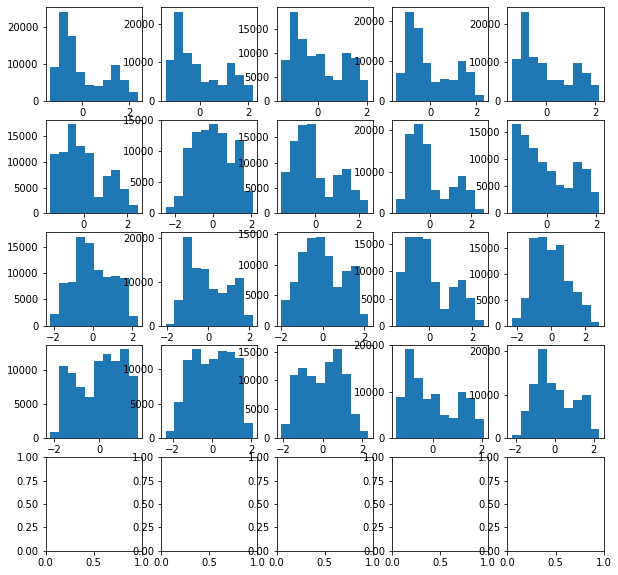

In [ ]:
import math
# Normalize distance to the stations
num_stations = len(station_lat_long_pairs.index)
nr = nc = math.ceil(num_stations ** .5)
fig, ax = plt.subplots(nr, nc, figsize=(10,10))

count = 0
for station in station_lat_long_pairs.index:
  row = count // nr
  col = count % nc
  fires_with_distance[station] = (fires_with_distance[station] - fires_with_distance[station].mean()) / fires_with_distance[station].std()
  ax[row][col].hist(fires_with_distance[station])
  count += 1

Next, we iterate over every fire and pair it with its prior month's weather

In [ ]:
display(noaa_weather["MONTH"].unique())
display(fires_with_distance["DISCOVERY_MONTH"].unique())

# display(fires_with_distance)
# print(fires_with_distance.info())
# Get the closest station for each fire.
station_names = station_lat_long_pairs.index

REDUNDANT_LABELS = ["STATION", "STATION_NAME", "YEAR", "MONTH", "Unnamed: 0"]

NUM_MONTHS_PRIOR = 16 # Given the closest station, how many months back do we want to record in our vector?
NUM_CLOSEST_STATIONS = 0 # How many of the closest stations do we want to consider?

#get_matching_station = lambda weather_table, station, month, year: (weather_table[((weather_table["STATION_NAME"] == station) & (weather_table["MONTH"] == month) & (weather_table["YEAR"] == year))])

def get_matching_station(weather_table, station, month, year):
  return (weather_table[((weather_table["STATION_NAME"] == station) & (weather_table["MONTH"] == month) & (weather_table["YEAR"] == year))])

def prior_month_and_year(month, n, year):
  """
  Given a month and year pair, return the month and year pair for n months prior
  """
  p_month = ((month - n - 1) % 12) + 1
  p_year = year
  if p_month > month: # Indicates that the prior month occured in the prior year
    p_year += -1
  return p_month, p_year


# Make sure this function is working correctly
assert(prior_month_and_year(5, 3, 2012) == (2, 2012)) 
assert(prior_month_and_year(5, 5, 2012) == (12, 2011)) 
assert(prior_month_and_year(1, 1, 2012) == (12, 2011)) 
assert(prior_month_and_year(2, 7, 2012) == (7, 2011))

def find_n_closest_stations(fire_row):
  # Sort the values:
  # We can do this faster than O(n log(n)), but it isn't really worth it.
  # print(fire_row)
  distance = fire_row[station_names].sort_values()

  fire_month = fire_row["DISCOVERY_MONTH"]
  fire_year = fire_row["FIRE_YEAR"]
  primary_station = distance.index[0]

  # GET WEATHER FROM THE ONE CLOSEST STATION, FOR THE NUM_MONTHS_PRIOR MONTHS
  for j in range(1, NUM_MONTHS_PRIOR + 1):
    p_month, p_year = prior_month_and_year(fire_month, j, fire_year)
    prefix = f"PRIMARY_STATION_{j}_MONTHS_PRIOR_"
    weather_j_months_prior = get_matching_station(noaa_weather, primary_station, p_month, p_year)

    if not weather_j_months_prior.empty:
      weather_j_months_prior = weather_j_months_prior.iloc[0]
      weather_j_months_prior = weather_j_months_prior.drop(REDUNDANT_LABELS)
      weather_j_months_prior = weather_j_months_prior.add_prefix(prefix)
      fire_row = fire_row.append(weather_j_months_prior)
    else:
      print(f"Failed to find weather for j={j} months prior. Searched for {primary_station}:{p_month}:{p_year}")
      break
      # print(weather_j_months_prior)
      # assert(False)

  # GET WEATHER FOR NUM_CLOSEST_STATIONS STATIONS
  p_month, p_year = prior_month_and_year(fire_month, 1, fire_year)
  for i in range(1, NUM_CLOSEST_STATIONS + 1):
    station_name = distance.index[i]
    closest_station_prefix = f"CLOSEST_STATION_{i + 1}_"
    fire_row[closest_station_prefix] = station_name

    # Get the weather for that month, year, and station
    # weather = noaa_weather[((noaa_weather["STATION_NAME"] == station_name) & (noaa_weather["MONTH"] == month) & (noaa_weather["YEAR"] == year))]
    weather = get_matching_station(noaa_weather, station_name, p_month, p_year)
    if not weather.empty:
      weather = weather.iloc[0]
      weather = weather.drop(REDUNDANT_LABELS)
      weather = weather.add_prefix(closest_station_prefix)
      fire_row = fire_row.append(weather)
    else:
      print(f"Failed to find closest station match for {station_name}:{p_month}:{p_year}")
      break
      # print(weather)
      # print(get_matching_station(noaa_weather, station_name, p_month, p_year))
      # assert(False)
  
  return fire_row


fires_with_full_weather = fires_with_distance.apply(find_n_closest_stations, axis=1)
fires_with_full_weather = fires_with_full_weather.dropna() # Drop any records that we couldn't find past matches for.
# fires_with_full_weather = fires_raw[:5].apply(find_n_closest_stations, axis=1)
display(fires_with_full_weather)



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

array([ 2,  5,  6,  7,  3,  9, 10, 11,  4,  8,  1, 12])

Failed to find weather for j=4 months prior. Searched for BODIE:12:1991
Failed to find weather for j=4 months prior. Searched for BODIE:12:1991
Failed to find weather for j=4 months prior. Searched for BODIE:12:1991
Failed to find weather for j=5 months prior. Searched for STAMPEDE:12:1991
Failed to find weather for j=5 months prior. Searched for BODIE:12:1991
Failed to find weather for j=5 months prior. Searched for BODIE:12:1991
Failed to find weather for j=5 months prior. Searched for BODIE:12:1991
Failed to find weather for j=5 months prior. Searched for BODIE:12:1991
Failed to find weather for j=6 months prior. Searched for BODIE:12:1991
Failed to find weather for j=6 months prior. Searched for BODIE:12:1991
Failed to find weather for j=6 months prior. Searched for BODIE:12:1991
Failed to find weather for j=6 months prior. Searched for BODIE:12:1991
Failed to find weather for j=6 months prior. Searched for STAMPEDE:12:1991
Failed to find weather for j=6 months prior. Searched for 

,BODIE,BROOKS,COHASSET,CONTAINMENT_MONTH,CONT_DATE,CONT_DOY,CONT_TIME,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_MONTH,DISCOVERY_TIME,EEL_RIVER,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_YEAR,FOD_ID,HELL_HOLE,HERNANDEZ,HUNTER_MOUNTAIN,JUANITA_LAKE,LADDER_BUTTE,LAS_TABLAS,LATITUDE,LA_HONDA,LONGITUDE,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_NAME,OAK_CREEK,OWNER_DESCR,PANAMINT,PILOT_HILL,PRIMARY_STATION_10_MONTHS_PRIOR_ELEVATION,PRIMARY_STATION_10_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH,PRIMARY_STATION_10_MONTHS_PRIOR_EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,PRIMARY_STATION_10_MONTHS_PRIOR_HEATING_DEGREE_DAYS_TO_DATE,PRIMARY_STATION_10_MONTHS_PRIOR_LATITUDE,PRIMARY_STATION_10_MONTHS_PRIOR_LONGITUDE,PRIMARY_STATION_10_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY,PRIMARY_STATION_10_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY_CUMULATIVE,PRIMARY_STATION_10_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,...,PRIMARY_STATION_8_MONTHS_PRIOR_LONGITUDE,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY_CUMULATIVE,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,PRIMARY_STATION_8_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,PRIMARY_STATION_8_MONTHS_PRIOR_TEMPERATURE_AVERAGE,PRIMARY_STATION_8_MONTHS_PRIOR_TEMPERATURE_MAX,PRIMARY_STATION_8_MONTHS_PRIOR_TEMPERATURE_MIN,PRIMARY_STATION_9_MONTHS_PRIOR_ELEVATION,PRIMARY_STATION_9_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH,PRIMARY_STATION_9_MONTHS_PRIOR_EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,PRIMARY_STATION_9_MONTHS_PRIOR_HEATING_DEGREE_DAYS_TO_DATE,PRIMARY_STATION_9_MONTHS_PRIOR_LATITUDE,PRIMARY_STATION_9_MONTHS_PRIOR_LONGITUDE,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY_CUMULATIVE,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,PRIMARY_STATION_9_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,PRIMARY_STATION_9_MONTHS_PRIOR_TEMPERATURE_AVERAGE,PRIMARY_STATION_9_MONTHS_PRIOR_TEMPERATURE_MAX,PRIMARY_STATION_9_MONTHS_PRIOR_TEMPERATURE_MIN,SCORPION,SOLDIER_MOUNTAIN,SOURCE_REPORTING_UNIT_NAME,SOURCE_SYSTEM,SOURCE_SYSTEM_TYPE,SQUAW_LAKE,STAMPEDE,STATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,Unnamed: 0,VAN_BREMMER,WOLVERTON
0,-0.501752,-0.841998,-1.128433,2,2453403.5,33.0,1730.0,2453403.5,33,2,1300.0,-0.848324,0.10,A,2005,1,-1.000659,0.195610,0.434939,-0.886032,-1.114178,0.448456,40.036944,-0.394781,-121.005833,FS,Plumas National Forest,0.297877,USFS,0.545114,-0.914818,1.192259,-0.339638,-0.500065,1.128375,39.4833,-120.0750,-0.886171,-1.239760,0.790151,...,-120.0750,-0.886171,-1.239760,-0.445271,0.861353,-0.641117,-0.155696,-0.028466,0.129808,0.463378,-0.275781,1.192259,-0.208114,-0.298527,1.181770,39.4833,-120.0750,-0.886171,-1.239760,0.378343,-0.512581,-0.641117,-0.155696,1.142978,-0.441780,-0.203511,-0.694943,-0.846454,-1.044163,Plumas National Forest,FS-FIRESTAT,FED,0.687200,-1.139269,CA,9.0,Miscellaneous,0,-0.918627,0.410736
1,-1.237103,-0.939629,-0.802799,5,2453137.5,133.0,1530.0,2453137.5,133,5,845.0,-0.597768,0.25,A,2004,2,-1.471873,-0.562875,-0.243079,-0.487813,-0.669480,-0.281374,38.933056,-0.869095,-120.404444,FS,Eldorado National Forest,-0.451833,USFS,-0.057172,-1.280961,0.525056,1.107121,1.246597,-1.892349,39.0717,-120.4217,1.462712,0.616480,-1.143144,...,-120.4217,1.228810,0.887540,-1.045693,1.184631,0.899683,-0.155696,-0.935826,1.008103,0.901795,1.079010,0.525056,0.449504,1.179417,-1.346469,39.0717,-120.4217,1.000752,0.740623,-1.080272,1.184631,-0.641117,-0.155696,-0.935826,0.882632,0.76

In [ ]:
get_matching_station(noaa_weather, "HELL_HOLE", 4, 2004)

,Unnamed: 0,STATION,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,YEAR,MONTH,NUM_COOLING_DEGREE_DAY_CUMULATIVE,NUM_COOLING_DEGREE_DAY,NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,EXTREME_MAXIMUM_TEMPERATURE_MONTH,HEATING_DEGREE_DAYS_TO_DATE,NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,TEMPERATURE_AVERAGE,TEMPERATURE_MAX,TEMPERATURE_MIN
5456,2316,USR0000CHEL,39.0717,-120.4217,0.525056,HELL_HOLE,2004,4,-1.23976,-0.886171,-0.155696,1.500567,-1.159138,-0.641117,-0.97032,-0.997255,0.9609,1.374855,-1.215516,-1.277944,-1.06171


In [ ]:
fires_with_full_weather.to_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/cleaned_fires_data_with_four_closest_stations_nov21_dont_use_this.csv")

In [ ]:
import seaborn as sns
corr = fires_with_full_weather.iloc[:10000].select_dtypes(include = "number").corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr,
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, square=True);

More cleaning to do!

In [ ]:
# We want to get a list of all the columns that are numerical and havent been normalized yet
numeric_features = fires_with_full_weather.select_dtypes(include="number")
categorical_features = fires_with_full_weather.select_dtypes(include="object")
print(numeric_features.info(verbose=True))
print(categorical_features.info(verbose=True))